# Image Classification (Color)
# Convolutional Neural Networks Practice Project
## (Keras | Tensorflow)
_
### Clasificación de imágenes (Color)
**Práctica de CNN**


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

## Data | Datos

**The data is the the CIFAR-10 dataset, consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.**

_


Los datos son el dataset CIFAR-10, consta de 60000 imágenes en color de 32x32 en 10 clases, con 6000 imágenes por clase. Hay 50000 imágenes de entrenamiento y 10000 imágenes de prueba.



### Class labels | Etiquetas de la clase

  airplane : 0

  automobile : 1
  
  bird : 2
  
  cat : 3
  
  deer : 4
  
  dog : 5
  
  frog : 6
  
  horse : 7
  
  ship : 8

  truck : 9

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 39s 0us/step


In [8]:
x_train.shape

(50000, 32, 32, 3)

In [7]:
x_train[0].shape

(32, 32, 3)

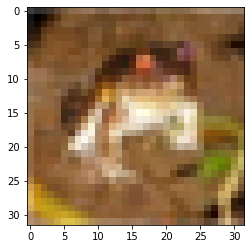

In [9]:
plt.imshow(x_train[0])

_

**Scaling**

**Since we are dealing with images  we can assume we are expecting values always between 0 and 255 and, a simple scaling  can be done just by dividing  255**

Dado que estamos tratando con imágenes podemos suponer que estamos esperando valores siempre entre 0 y 255 y, se puede hacer un escalamiento simplemente dividiendo entre 255

In [10]:
x_train = x_train/255
x_test = x_test/255

_

**Let's make sure Keras knows this is a classification problem transforming the y label into categorical data**

Hay que asegurarse que Keras sepa que este es un problema de clasificación transformando y en datos categóricos

In [11]:
from tensorflow.keras.utils import to_categorical

In [12]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

### Model | Modelo

In [14]:
x_train.shape

(50000, 32, 32, 3)

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [16]:
model = Sequential()

#  CONVO
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
# POOL
model.add(MaxPool2D(pool_size=(2,2)))

#  CONVO
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation='relu'))
# POOL
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [24]:
model.fit(x_train, y_cat_train, validation_data=(x_test, y_cat_test), epochs=15, callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 23s 15ms/step - loss: 1.7271 - accuracy: 0.3677 - val_loss: 1.3117 - val_accuracy: 0.5316
Epoch 2/15
1563/1563 [==============================] - 24s 15ms/step - loss: 1.2140 - accuracy: 0.5672 - val_loss: 1.1225 - val_accuracy: 0.6074
Epoch 3/15
1563/1563 [==============================] - 24s 16ms/step - loss: 1.0372 - accuracy: 0.6315 - val_loss: 1.0546 - val_accuracy: 0.6323
Epoch 4/15
1563/1563 [==============================] - 24s 15ms/step - loss: 0.9202 - accuracy: 0.6778 - val_loss: 1.0076 - val_accuracy: 0.6486
Epoch 5/15
1563/1563 [==============================] - 23s 14ms/step - loss: 0.8225 - accuracy: 0.7104 - val_loss: 0.9818 - val_accuracy: 0.6612
Epoch 6/15
1563/1563 [==============================] - 23s 15ms/step - loss: 0.7377 - accuracy: 0.7407 - val_loss: 1.0050 - val_accuracy: 0.6631
Epoch 7/15
1563/1563 [==============================] - 23s 15ms/step - loss: 0.6735 - accuracy: 0.7637 - val_loss: 0.9806 -

---
## Performance Evaluation | Evaluación del desempeño

In [27]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.512545,0.45288,1.311735,0.5316
1,1.187787,0.57974,1.122527,0.6074
2,1.033572,0.63420,1.054638,0.6323
3,0.920076,0.67854,1.007635,0.6486
4,0.832024,0.70782,0.981771,0.6612
5,0.751575,0.73738,1.004979,0.6631
6,0.682497,0.75980,0.980554,0.6773
7,0.616950,0.78250,0.955105,0.6845
8,0.552252,0.80584,1.040494,0.6721
9,0.493722,0.82616,1.053789,0.6856


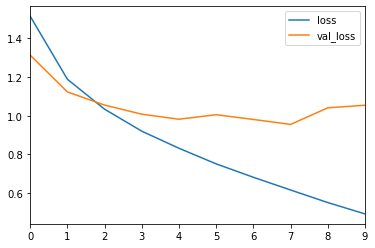

In [31]:
metrics[['loss','val_loss']].plot()

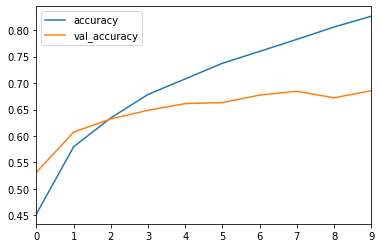

In [32]:
metrics[['accuracy','val_accuracy']].plot()

In [34]:
model.metrics_names

['loss', 'accuracy']

In [33]:
model.evaluate(x_test, y_cat_test, verbose=0)

[1.0537892580032349, 0.6855999827384949]

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
predictions = np.argmax(model.predict(x_test), axis=-1)

In [37]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.70      0.72      1000
           1       0.81      0.78      0.79      1000
           2       0.62      0.56      0.59      1000
           3       0.50      0.53      0.51      1000
           4       0.61      0.65      0.63      1000
           5       0.58      0.57      0.58      1000
           6       0.75      0.78      0.76      1000
           7       0.79      0.69      0.73      1000
           8       0.81      0.76      0.78      1000
           9       0.69      0.84      0.76      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



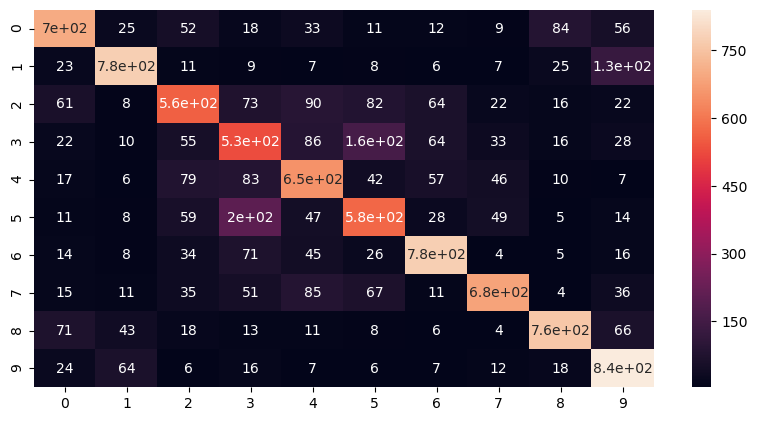

In [39]:
plt.figure(dpi=100, figsize=(10,5))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

---
## Prediction on a new image

**Predicción sobre una nueva imagen**

In [45]:
new_image = x_test[0]

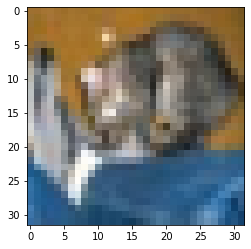

In [46]:
plt.imshow(new_image)

In [48]:
np.argmax(model.predict(new_image.reshape(1,32,32,3)), axis=-1)

array([3], dtype=int64)

In [50]:
np.argmax(y_cat_test[0])

3

## Model predicted accurately

**El modelo predijo con precisión**